# Exploratory Data Analysis for Solar Radiation Data
## 1. Import Libraries

In [3]:
import sys
import os
notebook_dir = os.getcwd()  # Get current working directory (notebooks folder)
project_dir = os.path.abspath(os.path.join(notebook_dir, '..'))  # Go up one level
scripts_dir = os.path.join(project_dir, 'scripts')  # Path to scripts
sys.path.append(scripts_dir)


In [4]:
# Import necessary libraries
import pandas as pd
from utils import (
    load_data, convert_timestamp_to_index, report_negative_values,
    replace_negative_with_median, detect_outliers, plot_outliers, data_overview,
    plot_wind_vs_ghi, plot_rh_vs_tamb, plot_rh_vs_dhi, plot_wind_direction,
    plot_histograms, plot_rh_vs_variables, plot_bubble_charts, plot_monthly_trends,
    plot_daily_trends, plot_cleaning_impact, plot_correlation_heatmap,plot_time_series,replace_outliers_with_mean
)

## 2. Importing Data

In [6]:
# Load data
df = load_data('../data/sierraleone-bumbuna.csv')

## Summary Statistics and Missing-Value Report

In [8]:
# Display data overview
overview = data_overview(df)
print("Shape:", overview['shape'])
print("\nData Types:")
for col, dtype in overview['dtypes'].items():
    print(f"{col}: {dtype}")
print("\nSummary Statistics:")
print(pd.DataFrame(overview['describe']))
print("\nMissing Values:")
print(pd.Series(overview['missing_values']))
df.select_dtypes(include='number').describe()

Shape: (525600, 19)

Data Types:
Timestamp: object
GHI: float64
DNI: float64
DHI: float64
ModA: float64
ModB: float64
Tamb: float64
RH: float64
WS: float64
WSgust: float64
WSstdev: float64
WD: float64
WDstdev: float64
BP: int64
Cleaning: int64
Precipitation: float64
TModA: float64
TModB: float64
Comments: float64

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb       

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [9]:
missing_percent = df.isna().mean() * 100
null_column_percentage = missing_percent[missing_percent > 5]
null_column_percentage

Comments    100.0
dtype: float64

## Outlier Detection & Basic Cleaning

### 1. Negative values

In [12]:
# Report negative values
negatives = report_negative_values(df)
for col, (count, percentage) in negatives.items():
    print(f"Column {col} has {count} negative values and {percentage}% of the data")

Column GHI has 261135 negative values and 49.68% of the data
Column DNI has 266352 negative values and 50.68% of the data
Column DHI has 263128 negative values and 50.06% of the data


### Action

In [14]:
# Replace negative values with median
df = replace_negative_with_median(df)

### 2. Outliers

In [16]:
# Detect and report outliers
outliers = detect_outliers(df)
for col, (count, percentage, _) in outliers.items():
    print(f"Column {col} has {count} outliers and {percentage}% of the data")

Column ModA has 1604 outliers and 0.31% of the data
Column ModB has 2041 outliers and 0.39% of the data
Column WS has 3967 outliers and 0.75% of the data
Column WSgust has 3665 outliers and 0.7% of the data


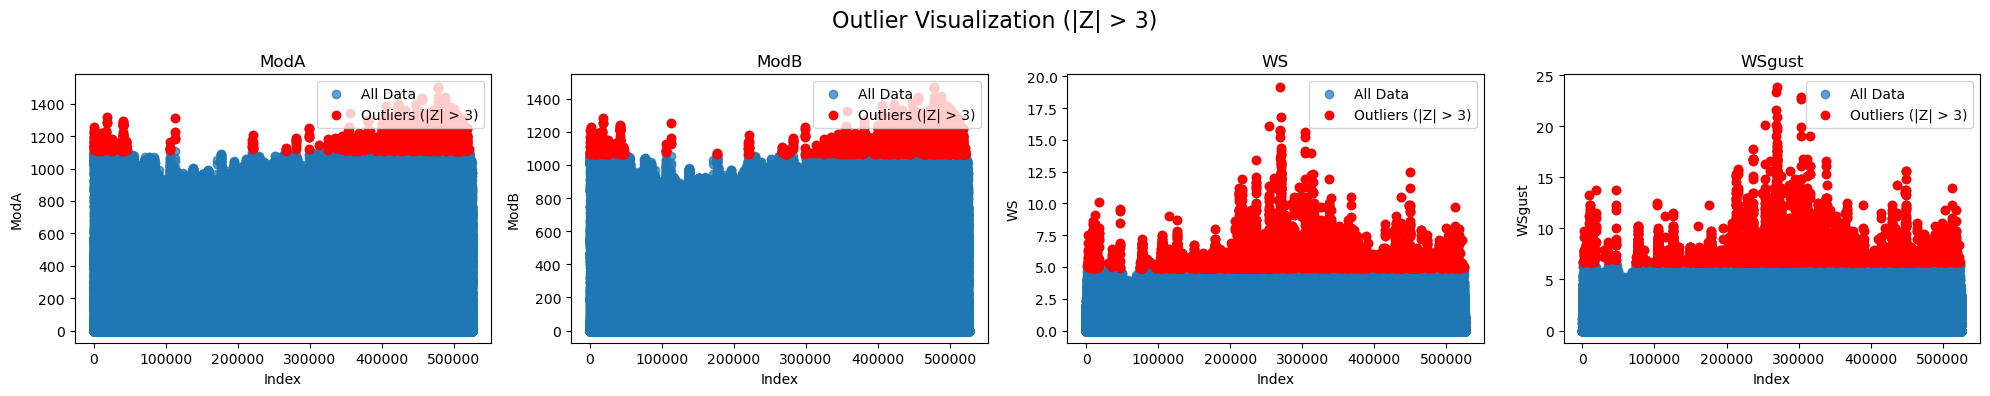

In [17]:
# Plot outliers
plot_outliers(df)

### Action

In [19]:
## Replace Outlier values with mean value of the column
cols = ['ModA', 'ModB', 'WS', 'WSgust']
df = replace_outliers_with_mean(df,cols)

Replaced 1604 outliers in column 'ModA' with mean 203.67
Replaced 2041 outliers in column 'ModB' with mean 194.46
Replaced 3967 outliers in column 'WS' with mean 1.11
Replaced 3665 outliers in column 'WSgust' with mean 1.65


In [20]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,383.017951,174.952927,228.914088,203.665472,194.461795,26.319394,79.448857,1.109028,1.645261,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,217.653053,193.599354,105.439689,296.024918,282.875441,4.398605,20.520775,1.157065,1.509348,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,356.700000,115.300000,225.000000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,359.500000,115.300000,225.000000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,115.300000,225.000000,353.800000,338.500000,29.400000,96.700000,1.900000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1109.200000,1064.000000,39.900000,100.000000,4.800000,6.400000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


## Remove Columns

In [22]:
df.drop('Comments',  axis=1, inplace=True)

## Save Data

In [24]:
df.to_csv('../data/sierraleone_clean.csv', index=False)

## Time Series Analysis

In [26]:
# Convert Timestamp to datetime index
df = convert_timestamp_to_index(df)
print(f"Index type after conversion: {type(df.index)}")  

Index type after conversion: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


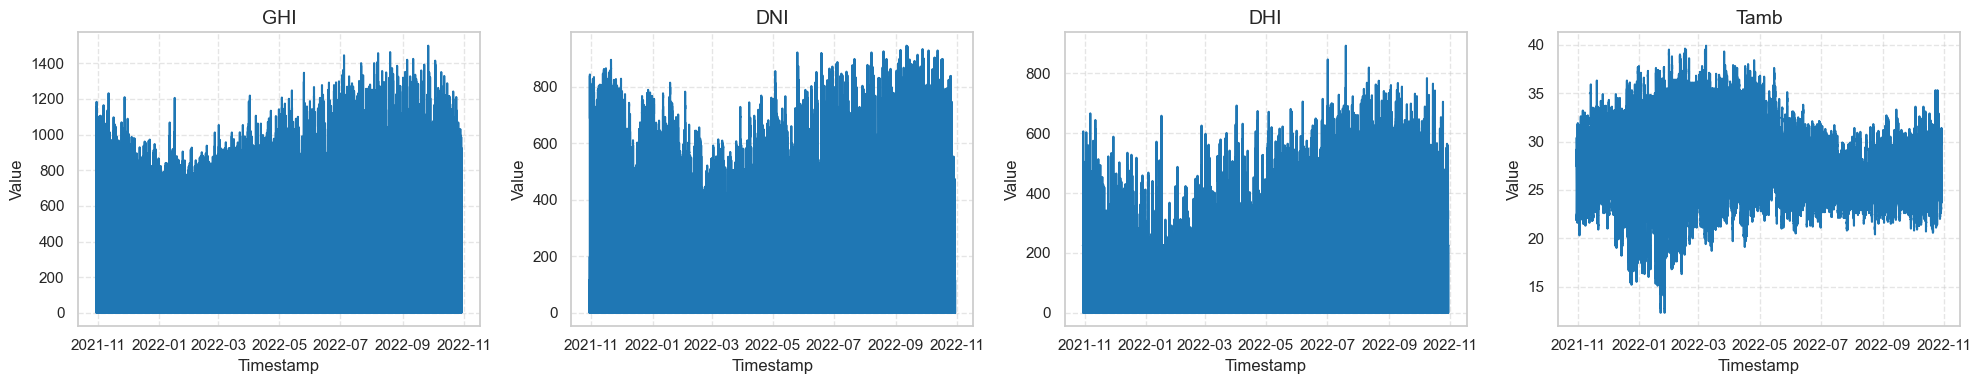

In [27]:
# Plot time series for GHI, DNI, DHI, Tamb
plot_time_series(df)

## Time Series Patterns by Month

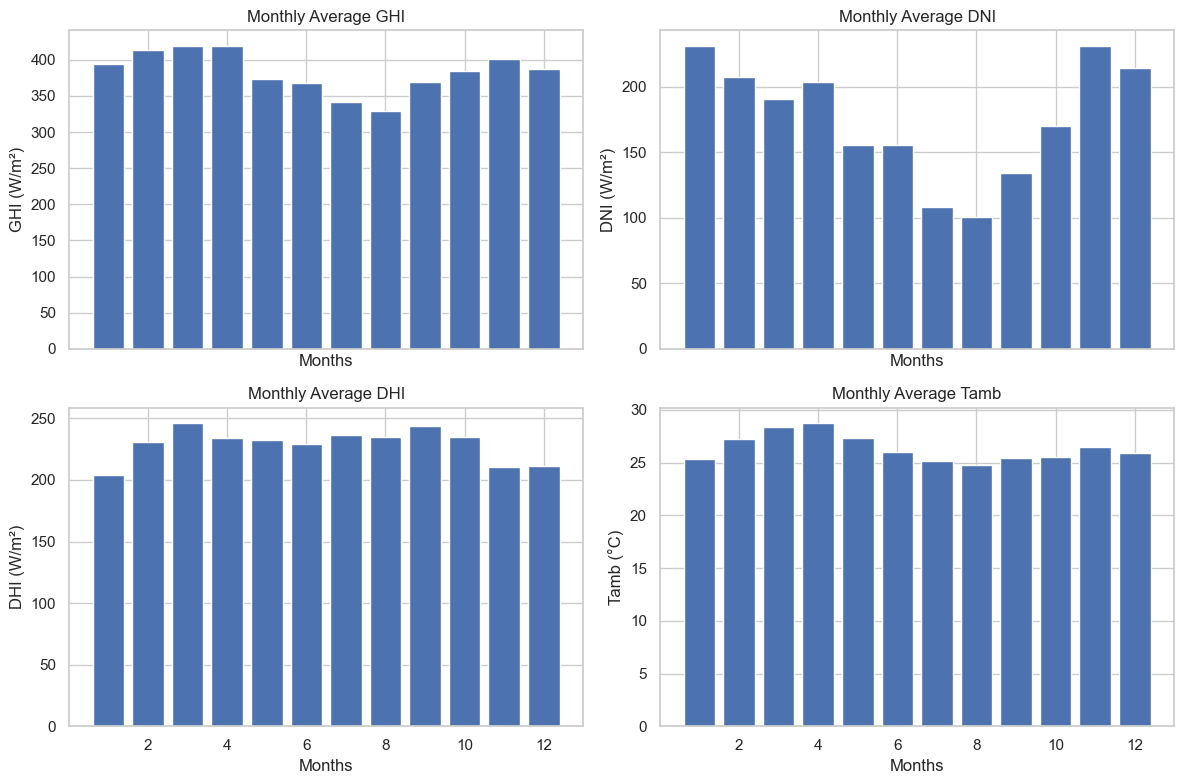

In [29]:
# Plot monthly trends
plot_monthly_trends(df)

## Daily Time Series Patterns

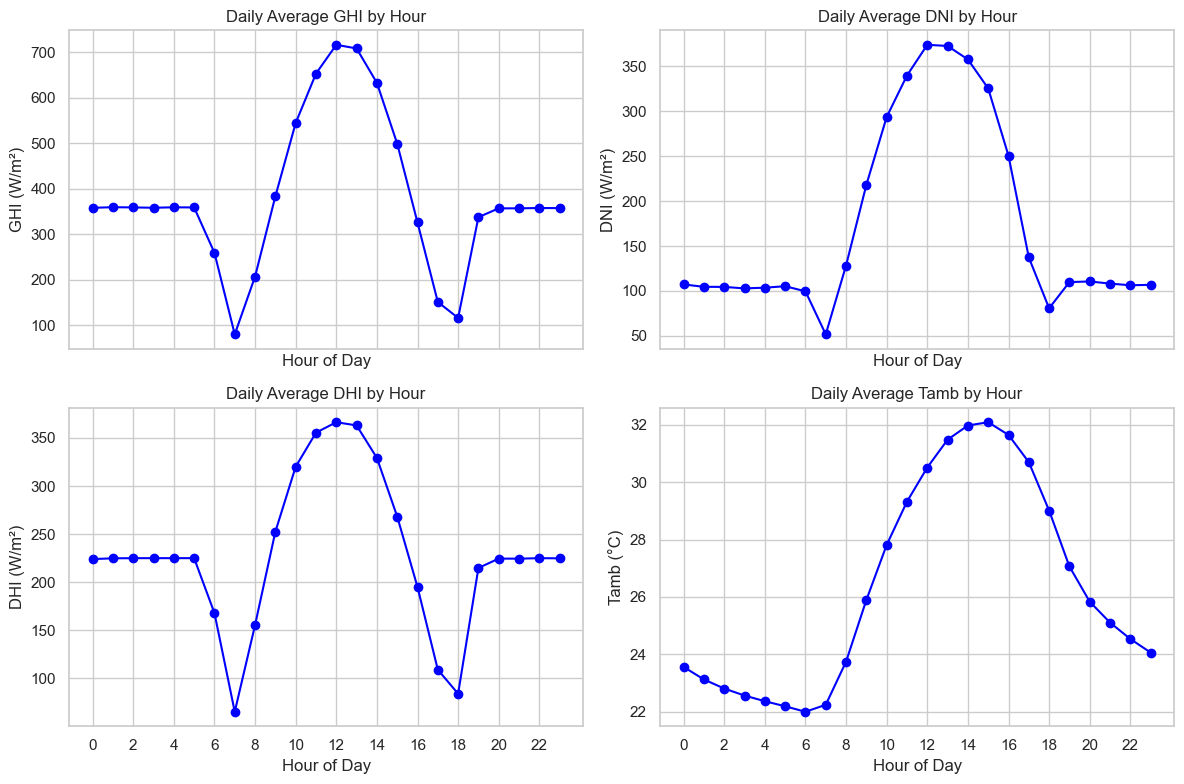

In [31]:
# Plot daily trends
plot_daily_trends(df)

## Cleaning Impact

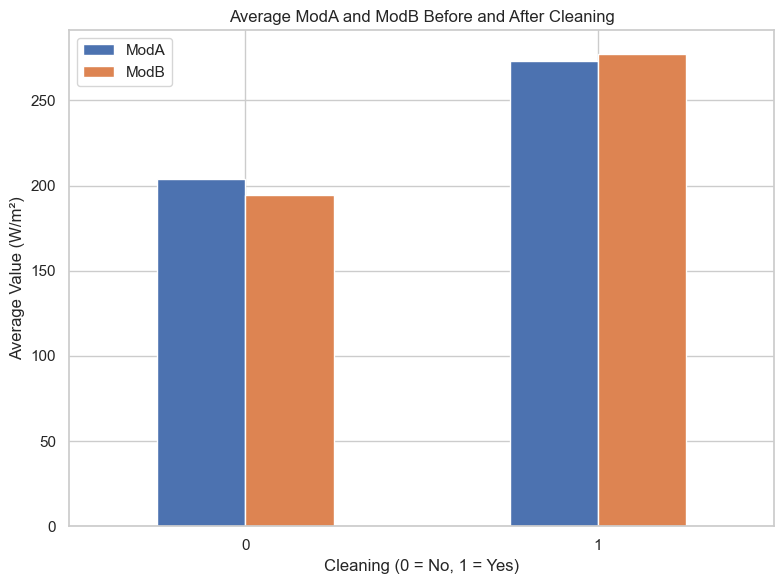

In [33]:
# Plot cleaning impact
plot_cleaning_impact(df)

## Correlation & Relationship Analysis

### Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

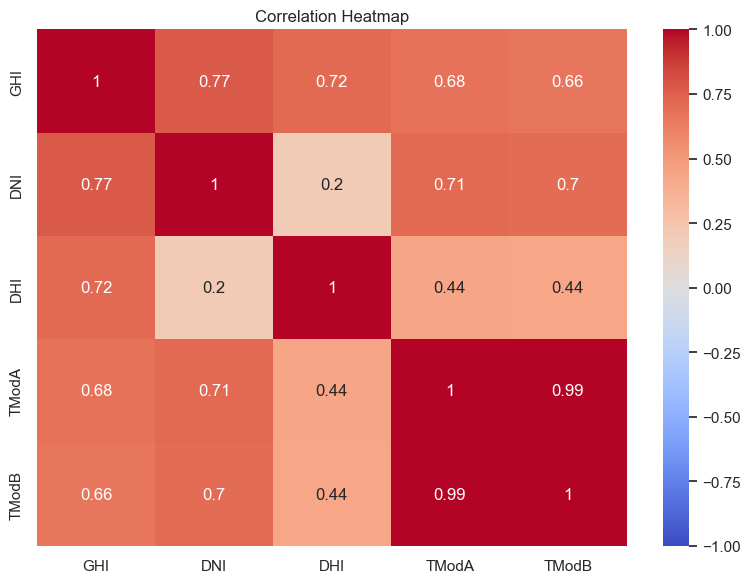

In [36]:
# Plot correlation heatmap
plot_correlation_heatmap(df)

### Scatter plots: WS, WSgust, WD vs. GHI

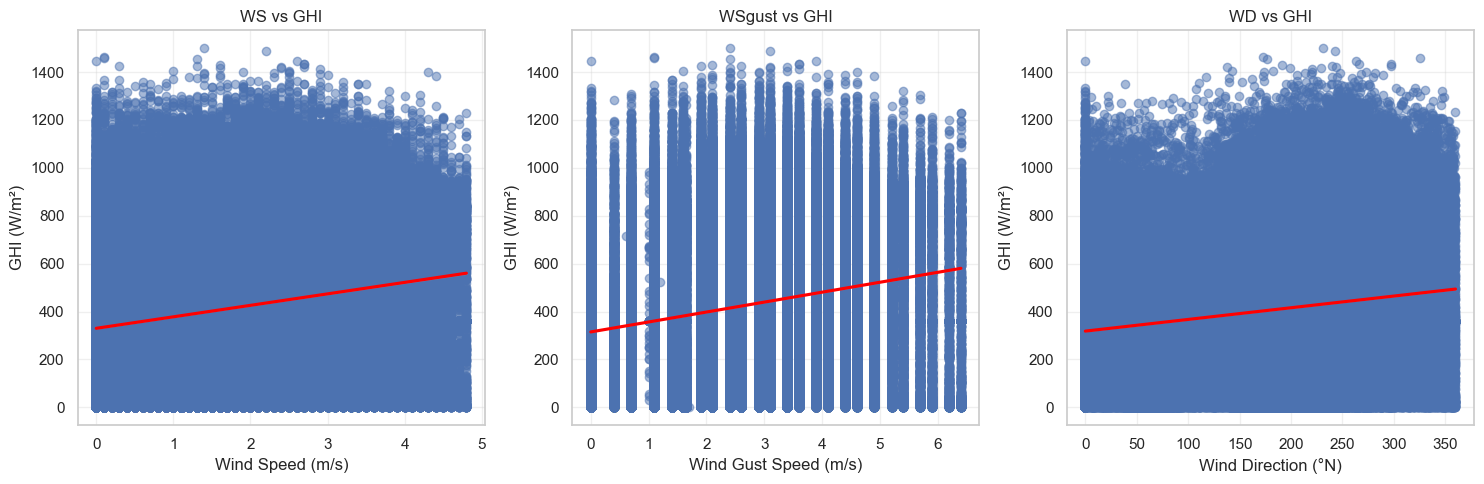

In [38]:
# Plot wind-related variables vs. GHI
plot_wind_vs_ghi(df)

### RH vs. Tamb

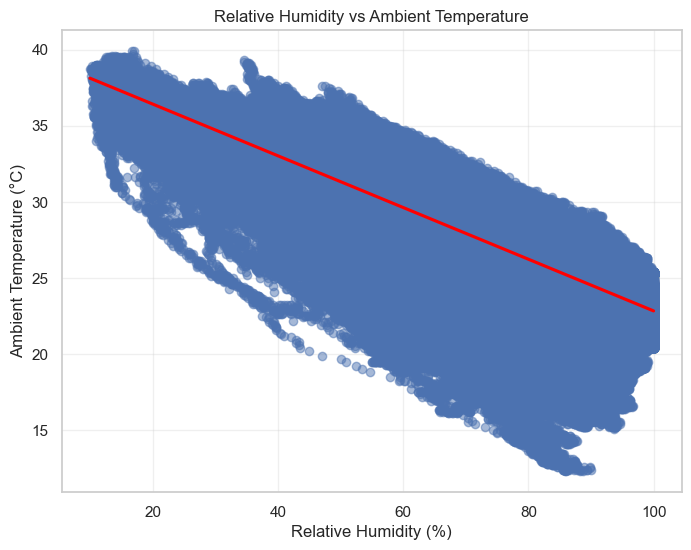

In [40]:
# Plot Relative Humidity vs. Ambient Temperature
plot_rh_vs_tamb(df)

###  RH vs. GHI

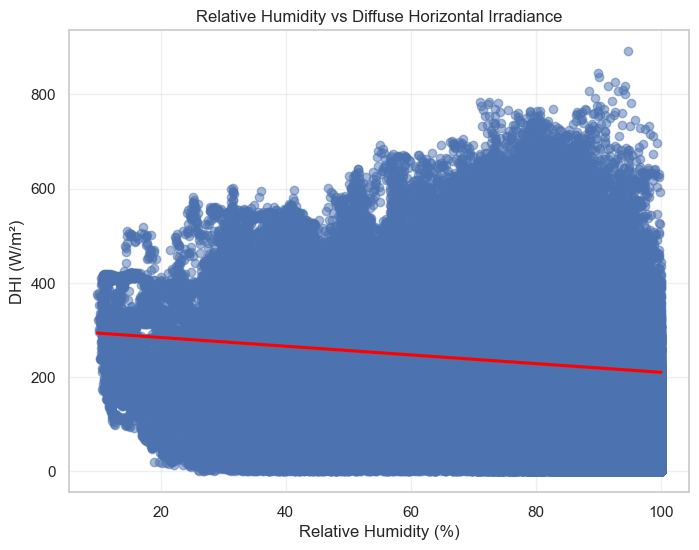

In [42]:
# Plot Relative Humidity vs. Diffuse Horizontal Irradiance
plot_rh_vs_dhi(df)

## Wind & Distribution Analysis

### Radial bar plot of WS/WD.

C:\Users\hp\Documents\10\solar-challenge-week1\scripts\utils.py:446: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wd_speed = df.groupby('WD_bin')['WS'].mean()


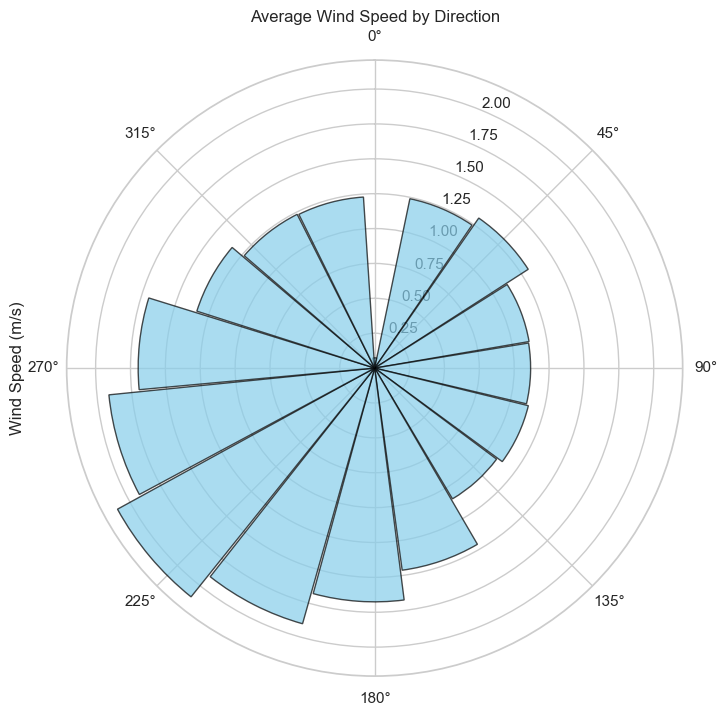

In [45]:
# Plot wind direction analysis
plot_wind_direction(df)

### Histograms for GHI and one other variable (e.g. WS).

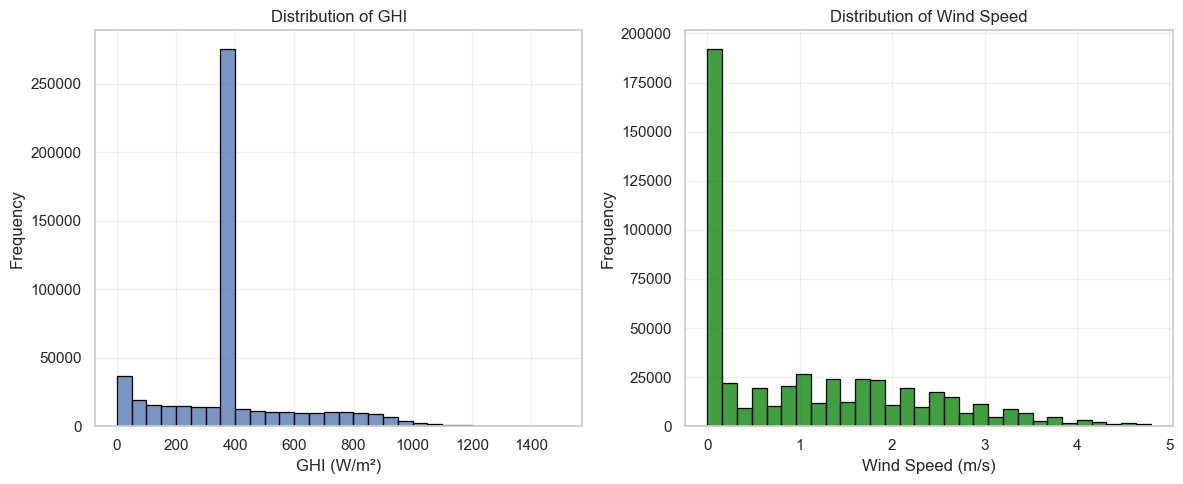

In [47]:
# Plot histograms for GHI and WS
plot_histograms(df)

## Temperature Analysis

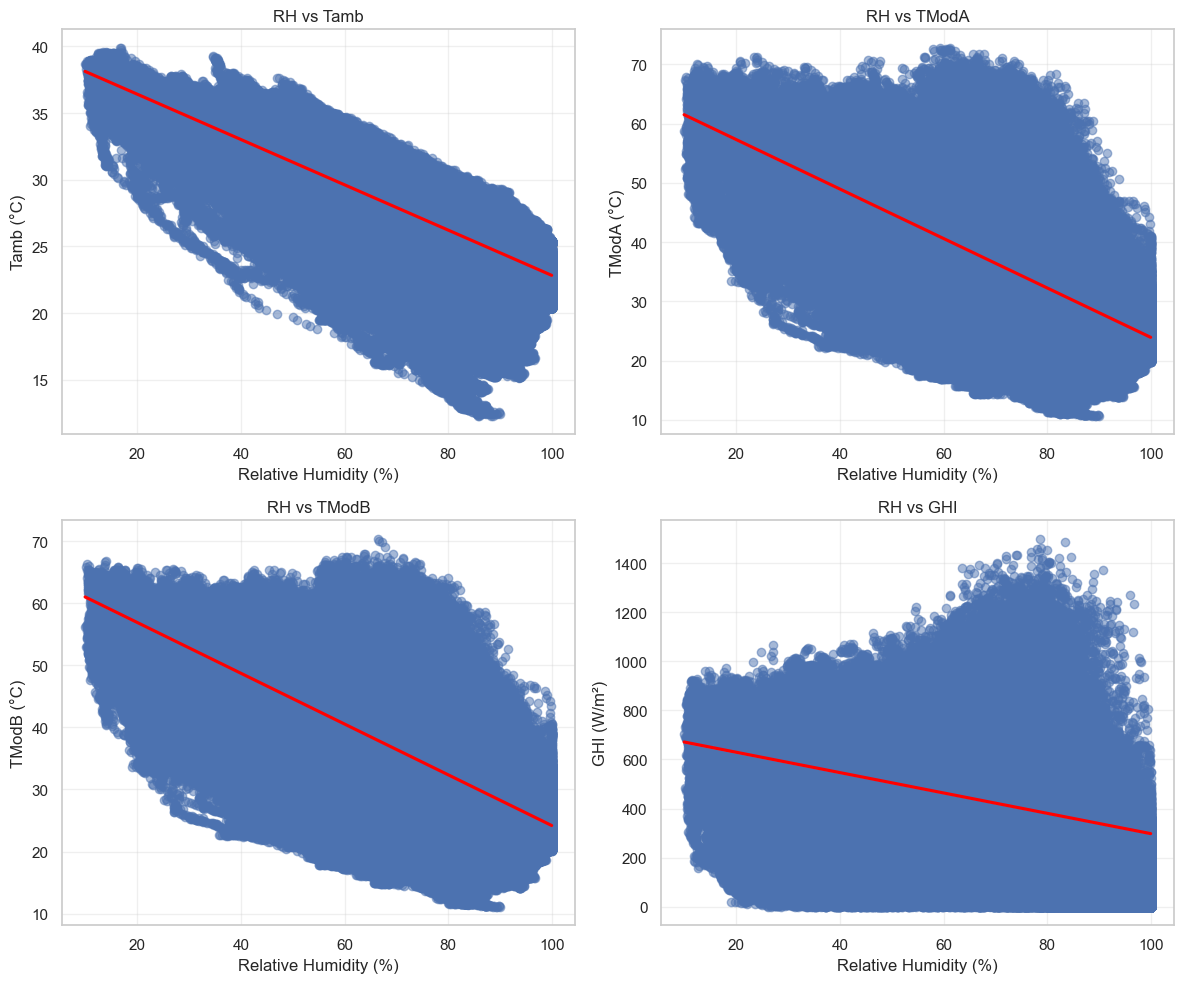

In [49]:

# Plot RH vs. multiple variables
variables = ['Tamb', 'TModA', 'TModB', 'GHI']
units = ['°C', '°C', '°C', 'W/m²']
plot_rh_vs_variables(df, variables, units)


### Bubble Chart


In [ ]:
# Plot bubble charts
plot_bubble_charts(df)